![dsl_logo.png](https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/dsl_logo.png)

# Analyzing Web Archives

Welcome to the Digital Scholarship Lab Level Analyzing Web Archives workshop. The following notebook provides an investigation into the [Meme Generator dataset](https://www.loc.gov/item/2018655320/)


## How this notebook works

This webpage is a Google Colab notebook and is comprised of different *cells*. Some are code cells that run Python snippets. To works through these cells simply click on the triangle _run_ button in each cell. Click in the cell below to see the play button, then click on it.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#from IPython.core.display import display,HTML
from IPython.display import Image,display

print("Libraries loaded, and ready to run!")

Libraries loaded, and ready to run!


# Loading our data set

The information from this archive is saved in a _CSV_ file. Or put in otherwords, something like a spreadsheet. In the next cell we will load this file into something call a dataframe and we'll look at the first 5 entries by looking at the **head**.

In [ ]:
meme_data = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/memegenerator.csv", sep=",")
meme_data.head(5)

,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
0,10509464,http://webarchive.loc.gov/all/0/http://cdn.mem...,Spiderman Approves,http://memegenerator.net/instance/10509464,91eee1453f2b66b4b0d662476bf630d8,87868,seems legit,Spiderman Approves,seems,legit
1,12285257,http://webarchive.loc.gov/all/0/http://cdn.mem...,Alright Then Business Kid,http://memegenerator.net/instance/12285257,96a3aa60c0f3a5ffb027e8977f23b2cc,110242,Fret not I stayed at a Holiday Inn Express las...,Alright Then Business Kid,Fret not,I stayed at a Holiday Inn Express last night
2,20612245,http://webarchive.loc.gov/all/0/https://cdn.me...,Archer,http://memegenerator.net/instance/20612245,1b84704851704a2dc366768a2210d659,125963,"hello airplanes? yeah, this is blimps. Yeah, y...",Archer,"hello airplanes? yeah, this is blimps.","Yeah, you win."
3,20614628,http://webarchive.loc.gov/all/0/http://cdn.mem...,Futurama Fry,http://memegenerator.net/instance/20614628,448f5d4a15f5c90ce4d64c75013c8e9a,161623,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...,Futurama Fry,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...,BUt Scared monster under the bed will eat me
4,24194267,http://webarchive.loc.gov/all/0/https://cdn.me...,One Does Not Simply,http://memegenerator.net/instance/24194267,37feb180a0e7660e360ed94380b39f60,92866,one does not simply put toothpaste back in th...,One Does Not Simply,one does not simply,put toothpaste back in the tube


# Some General Data Exploration




---



### How much data?

We can count the **length** of our data frame to see how many entries we have

In [ ]:

print("We have this many memes to look at: ",len(meme_data))


We have this many memes to look at:  57687


### Random Entry

To get a better sense of what is in our dataset let's look at a random entry by using **sample** with a value of 1. Click the below button a few times to get a few different options.

In [ ]:
rando = meme_data.sample(1)
display(Image(url=rando['Archived URL'].values[0], format='jpg'))
print("View on Memegenerator: \t",rando['Meme Page URL'].values[0])
print("View on Archive: \t\t\t",rando['Archived URL'].values[0])
rando

View on Memegenerator: 	 http://memegenerator.net/instance/17389615
View on Archive: 			 http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/17389615.jpg


,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
25622,17389615,http://webarchive.loc.gov/all/0/http://cdn.mem...,Street Yoda,http://memegenerator.net/instance/17389615,629d4daded8d7adef34045d658f7551c,57381,отсасал хуй я тоже,Street Yoda,отсасал хуй,я тоже


**Q1** Have a look at the data that is associated with a random record. In the chat box suggest some things you might want to explore with this data? Share your reponse in the chat box.

# Category of memes?

As you might know, memes come in many different flavours. Let's see if we can find out how many types there are? We'll do this by **grouping** our _Base Meme Name_ column and **counting** how many entries are in each.

In [ ]:
meme_data.groupby(["Base Meme Name"]).count()

,Meme ID,Archived URL,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
Base Meme Name,,,,,,,,,
-,70,70,70,70,70,70,70,70,70
10guy,1,1,1,1,1,1,1,1,1
12 oz mouse,9,9,9,9,9,9,9,9,9
158,66,66,66,66,66,66,66,66,66
1889 [10] guy,52,52,52,52,52,52,52,52,52
...,...,...,...,...,...,...,...,...,...
ТИПИЧНАЯ DIVA,45,45,45,45,45,45,45,45,45
ТИПИЧНЫЙ JONGHYUN,1,1,1,1,1,1,1,1,1
ТИПИЧНЫЙ ONEW,1,1,1,1,1,1,1,1,1


**Q2** Based on the above summary how many different type so memes we have? Share your response in the chat box.

Yikes! That looks like a lot. Let's just keep the top **25** entries. We'll do this by **sorting**.

In [ ]:
meme_data.groupby(["Base Meme Name"]).count().sort_values(by="Meme ID",ascending=False)[0:25]

,Meme ID,Archived URL,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
Base Meme Name,,,,,,,,,
Y U No,766,766,766,766,766,766,766,766,766
Futurama Fry,663,663,663,663,663,663,663,663,663
Insanity Wolf,612,612,612,612,612,612,612,612,612
Philosoraptor,531,531,531,531,531,531,531,531,531
The Most Interesting Man In The World,511,511,511,511,511,511,511,511,511
Success Kid,510,510,510,510,510,510,510,510,510
Foul Bachelor Frog,469,469,469,469,469,469,469,469,468
Socially Awkward Penguin,446,446,446,446,446,446,446,446,446
Advice Yoda Gives,420,420,420,420,420,420,420,420,420


In [ ]:
#@title Random Meme by Category
#@markdown Type copy and pasting one of the **Base Meme Name** to see a random entry from that category of meme
meme_option = "10guy" #@param {type:"string"}

rando = meme_data[meme_data["Base Meme Name"] == str(meme_option)].sample(1)
display(Image(url=rando['Archived URL'].values[0], format='jpg'))
print("View on Memegenerator: \t",rando['Meme Page URL'].values[0])
print("View on Archive: \t\t\t",rando['Archived URL'].values[0])
rando

View on Memegenerator: 	 http://memegenerator.net/instance/34090689
View on Archive: 			 http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/34090689.jpg


,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
56130,34090689,http://webarchive.loc.gov/all/0/https://cdn.me...,10guy,http://memegenerator.net/instance/34090689,c4677fed2de3af3bc5a2665b61a46f09,56513,Cant sort ascendingly no matter what compare f...,10guy,Cant sort ascendingly no matter what compare f...,"sort( a, a + n ); printf( %d, a[0], cmp );"


What's the **average** number of memes in each type?



In [ ]:
meme_type_average = meme_data.groupby(["Base Meme Name"])["Meme ID"].count().mean()
print("Average number of entries per meme category: ",meme_type_average)

Average number of entries per meme category:  34.940642035130224


Let's draw a **histogram** of this distribution

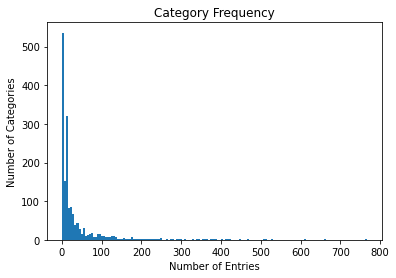

In [ ]:
bins = 150

plt.hist(meme_data.groupby(["Base Meme Name"]).count().sort_values(by="Meme ID",ascending=False)["Meme ID"],bins)

plt.title("Category Frequency")
plt.xlabel("Number of Entries")
plt.ylabel("Number of Categories")
plt.show()

**Q3** Can you describe this graph? What is the biggest value that it is showing?

data things to do
- alt text somehow?
- language detection?
- pull in scores via API?